In [ ]:
import csv
file_path = 'notes_etudiants.csv'

invalid_notes = []
missing_notes = []

with open(file_path, mode='r', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile, delimiter=';')
    header = next(reader)
    for i, row in enumerate(reader, start=2):
        for j, value in enumerate(row[2:], start=3):
            if value.strip() == "":
                missing_notes.append((i, header[j - 1]))
            else:
                try:
                    note = float(value)
                    if note < 0 or note > 20:
                        invalid_notes.append((i, header[j - 1], note))
                except ValueError:
                    invalid_notes.append((i, header[j - 1], value))

if invalid_notes:
    print("Notes invalides détectées :")
    for line, subject, value in invalid_notes:
        print(f" - Ligne {line}, Matière {subject}, Valeur {value}")
else:
    print("Aucune note invalide détectée.")

if missing_notes:
    print("\nNotes manquantes détectées :")
    for line, subject in missing_notes:
        print(f" - Ligne {line}, Matière {subject}")
else:
    print("\nAucune note manquante détectée.")

Notes invalides détectées :
 - Ligne 19, Matière Note d'Anglais, Valeur 21.0
 - Ligne 42, Matière Note de Mathématique, Valeur DEF

Notes manquantes détectées :
 - Ligne 25, Matière Note de Mathématique
 - Ligne 31, Matière Note d'Anglais


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(file_path, delimiter=';')
notes_columns = ["Note de Physique", "Note de Mathématique", "Note de Chimie", 
                 "Note d'Anglais", "Note de Corse", "Note de Projet"]

def clean_value(value):
    try:
        numeric_value = float(value)
        if 0 <= numeric_value <= 20:
            return numeric_value
        else:
            return 0
    except ValueError:
        return 0
    return 0

for col in notes_columns:
    data[col] = data[col].apply(clean_value)
    output_file_path = "notes_etudiants_clean.csv"
    data.to_csv(output_file_path, index=False, sep=';')
print(f"Les données nettoyées ont été sauvegardées dans '{output_file_path}'.")



Les données nettoyées ont été sauvegardées dans 'notes_etudiants_clean.csv'.


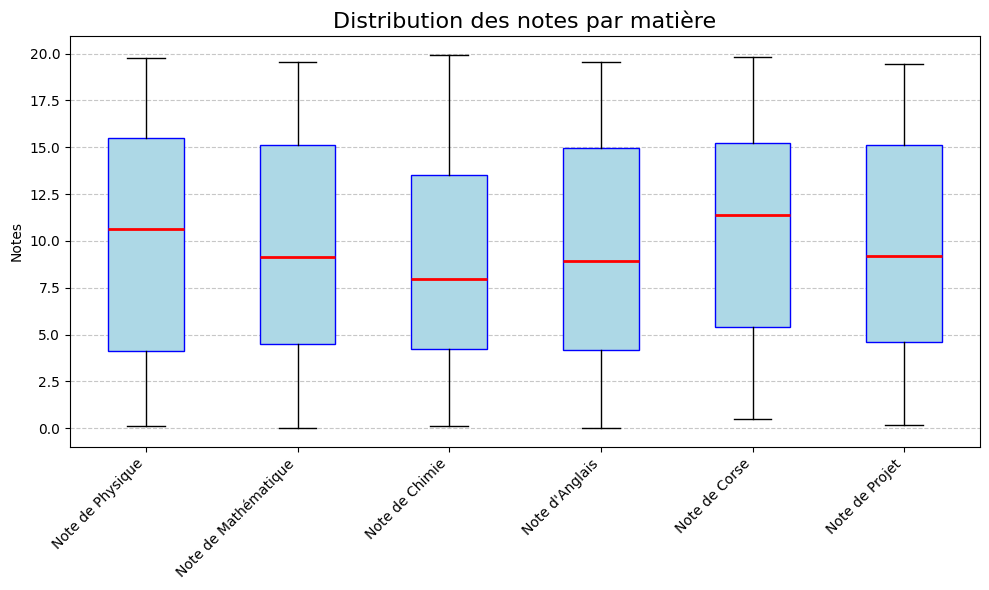

In [10]:
file_path = "notes_etudiants_clean.csv"
data = pd.read_csv(file_path, delimiter=';')

notes_columns = ["Note de Physique", "Note de Mathématique", "Note de Chimie", 
                 "Note d'Anglais", "Note de Corse", "Note de Projet"]
notes = data[notes_columns]

plt.figure(figsize=(10, 6))
plt.boxplot([notes[col] for col in notes_columns], vert=True, patch_artist=True, 
boxprops=dict(facecolor='lightblue', color='blue'), medianprops=dict(color='red', linewidth=2))

plt.xticks(range(1, len(notes_columns) + 1), notes_columns, rotation=45, ha='right', fontsize=10)
plt.ylabel("Notes")
plt.title("Distribution des notes par matière", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
